# Compare the Cache size to Cache Block size ratio

The cache size has a large impact on the prformance when accessing the memory. Here, the ratio of the cache size to cache block size ratio is explored. This essentially changes the number of blocks in the cache for the same cache size. If the data that is very close together is accessed frequently, having large block size will lead to a good performace. However, if data from many different sections of the memory is needed, then having many small blocks should perform better. Generally, it is better to find the sweet spot that can take advantages of both of these things.

In [9]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from glob import glob

block_cache_size_ratios = ['Block_Cache_Size_Ratio8', 'Block_Cache_Size_Ratio4', 'Block_Cache_Size_Ratio2']
results = {}

# For each policy, get the result files
for ratio in block_cache_size_ratios:
    # Each plicy will have a list in the dictionary of results
    results[ratio] = []
    for f_name in glob(os.path.join('..', 'cache_config', 'results', 'Cache_Size_Comparaison', ratio, '*.json')):
        print(f_name)
        with open(f_name) as f:
            results[ratio].append(json.load(f))
            f.close
        

../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio8/vet20parinum_config1_ratio8.json
../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio8/compitomin_config3_ratio8.json
../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio8/vet20parinum_config3_ratio8.json
../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio8/compitomin_config1_ratio8.json
../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio8/vet20parinum_config2_ratio8.json
../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio8/compitomin_config2_ratio8.json
../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio4/compitomin_config1_ratio4.json
../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio4/vet20parinum_config1_ratio4.json
../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio4/vet20parinum_config2_ratio4.json
../cache_config/results/Cache_Size_Comparaison/Block_Cache_Size_Ratio4/c

Now that we have loaded all result files, we can get the average for the AMAT across all configurations

In [10]:
def average(results, keyword):
    avrg = 0    
    for result in results:
        avrg += result[keyword]
        
    return avrg / len(results)
    

# Define the name of the variables of interest
interest_var = ['amat', 'amat_read', 'amat_write']
amat_results = {}

for var in interest_var:
    amat_results[var] = []
    for ratio in block_cache_size_ratios:
        amat_results[var].append(average(results[ratio], var))
    

In [11]:
amat_results

{'amat': [13.419609134826525, 12.414953886693018, 11.74014053579271],
 'amat_read': [12.678777861818455, 11.698051190109345, 10.99742742153869],
 'amat_write': [36.28787878787879, 35.10606060606061, 35.090909090909086]}

amat values:
	amat_Block_Cache_Size_Ratio8 = 13.419609134826525 cycles
	amat_Block_Cache_Size_Ratio4 = 12.414953886693018 cycles
	amat_Block_Cache_Size_Ratio2 = 11.74014053579271 cycles
amat_read values:
	amat_read_Block_Cache_Size_Ratio8 = 12.678777861818455 cycles
	amat_read_Block_Cache_Size_Ratio4 = 11.698051190109345 cycles
	amat_read_Block_Cache_Size_Ratio2 = 10.99742742153869 cycles
amat_write values:
	amat_write_Block_Cache_Size_Ratio8 = 36.28787878787879 cycles
	amat_write_Block_Cache_Size_Ratio4 = 35.10606060606061 cycles
	amat_write_Block_Cache_Size_Ratio2 = 35.090909090909086 cycles


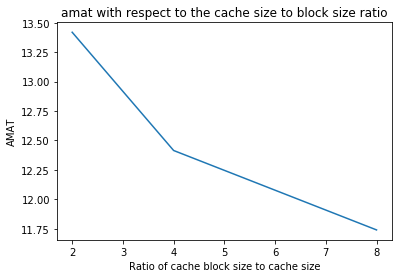

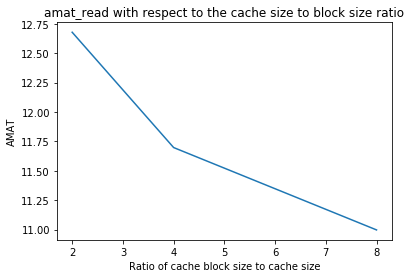

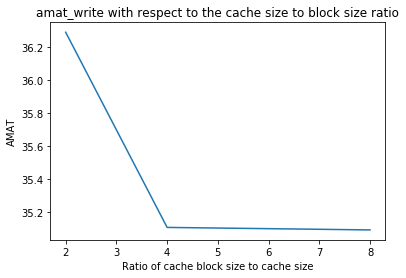

In [12]:
import math

for var in interest_var:
    print(var + " values:")
    for ratio in block_cache_size_ratios:
        print('\t' + var + '_' + ratio + " = " + str(amat_results[var][block_cache_size_ratios.index(ratio)]) + ' cycles')
        
ratio = []
for i in range(len(block_cache_size_ratios)):
    ratio.append(math.pow(2, (i+1)))

for var in interest_var:
    plt.plot(ratio, amat_results[var])
    plt.title(var + " with respect to the cache size to block size ratio")
    plt.xlabel('Ratio of cache block size to cache size')
    plt.ylabel('AMAT')
    plt.show()